In [14]:
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
wt_tiles = pd.read_csv("../data/wt_tiles.csv", sep = "\t")
wt_tiles = wt_tiles.rename(columns = {"AA sequence" : "tile"})
wt_tiles["Start"] = wt_tiles["AA interval"].str.split("-").str[0].astype(int)
wt_tiles["End"] = wt_tiles["AA interval"].str.split("-").str[1].astype(int)
wt_tiles["mid"] = (wt_tiles["Start"] + wt_tiles["End"]) / 2
wt_tiles

,Tile ID,AA interval,Length,SOG1 partim,tile,Remarks,Start,End,mid
0,1,1-40,40,NTD,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,/,1,40,20.5
1,2,11-50,40,NTD,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,/,11,50,30.5
2,3,21-60,40,NTD + NAC,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,/,21,60,40.5
3,4,31-70,40,NTD + NAC,WKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPE,/,31,70,50.5
4,5,41-80,40,NTD + NAC,KCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSG,/,41,80,60.5
5,6,51-90,40,NTD + NAC,VVDDWPGLPRGVKFDPSDPEIIWHLLAKSGLSGLSSHPFI,/,51,90,70.5
6,7,61-100,40,NAC,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,/,61,100,80.5
7,8,71-110,40,NAC,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,/,71,110,90.5
8,9,81-120,40,NAC,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,/,81,120,100.5
9,10,91-130,40,NAC,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,/,91,130,110.5


In [17]:
activities = pd.read_csv("../data/Sog1_library2_activities_with_reads_ECspike.csv")
activities = activities.rename(columns = {"AAseq" : "tile"})
activities

,ArrayDNA,Activity_S3_1,Activity_S3_2,reads_S3_1,reads_S3_2,tile,lib2_avg,lib2_std
0,AAACAAAGACAGAATCAGAATCAAGGTCAACAACAACCAACTTGGT...,1079.074274,925.703811,610.0,643.0,KQRQNQNQGQQQPTWFQSGSQFILNSQQLVQALSLCQQLL,1002.389042,108.449295
1,AAACAAAGAGATAATGAAGATAATGGTGAAGAAGATCCAACTTGGT...,1394.076068,1424.548173,44354.0,36001.0,KQRDNEDNGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,1409.312120,21.547032
2,AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...,1371.861742,1170.193129,68.0,38.0,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,1271.027436,142.601244
3,AAACAAATTGATATTTATAAATATGATCCATGGGATTTGCCAAGAG...,283.663233,267.611412,5090.0,7330.0,KQIDIYKYDPWDLPRVSSVGEKEWYFFCMRGRKYRNSVRP,275.637323,11.350351
4,AAACAAATTGTCTTGGATCCATCTAATATTGAATTGGATACTCCAC...,4076.691936,3163.539743,172.0,137.0,KQIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,3620.115839,645.696108
...,...,...,...,...,...,...,...,...
11264,TTTGATTCTCCAGATGTTGCTGAATCATTTGAAACTTCTCCATTGT...,2314.792506,2111.813429,124.0,121.0,FDSPDVAESFETSPLFANADADLAGQDAWFSLFPSISGGE,2213.302968,143.527882
11265,TTTGATTGGGAACCAACTGATTCTGGTTCTCAATTTATCTTAAATT...,4433.599889,4873.732571,6379.0,8831.0,FDWEPTDSGSQFILNSQQLVEALSLCDDLLGSQDREENTN,4653.666230,311.220804
11266,TTTGCTGCTGGTGCTAGGAAGAGAAGGAAGATTCATGATGATGACT...,1673.484641,1569.322449,816.0,769.0,FAAGARKRRKIHDDDFGDVRWHKAGRAKPVVLDGVQRGCK,1621.403545,73.653793
11267,TTTGTTAAAGATTCTTTGCAAGATATTGGTAAATACTTTGAAATTG...,1780.391373,2360.015854,75.0,73.0,FVKDSLQDIGKYFEIDSTLDELEQVESGEGNDDLPDEEER,2070.203613,409.856401


In [18]:
activities[activities["Activity_S3_1"].isna()]

,ArrayDNA,Activity_S3_1,Activity_S3_2,reads_S3_1,reads_S3_2,tile,lib2_avg,lib2_std
1641,AGAGGTAGAGGTAGAGGTAAAGGTAAATCTAGAGATAAACAAAGGA...,NaN,2144.574972,NaN,12.0,RGRGRGKGKSRDKQRKPGGPWRPEPNTSSPSMPELSPVLG,2144.574972,NaN
1742,ATGGAAGATGAAGTTCAATCTATTCAACCAAATCATGAAAGAGATG...,NaN,1967.557527,NaN,11.0,MEDEVQSIQPNHERDDDDPELEHGLENGAKEMLDDKEEQE,1967.557527,NaN
3918,CCAAAAGATGTCTTGCAATCTATTAATATTGAATTGGATACTCCAC...,NaN,1726.190989,NaN,14.0,PKDVLQSINIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,1726.190989,NaN
3986,CCAGATATTAATGATGATCCATTTAATGATTCATTTGATTGTGATC...,NaN,643.019161,NaN,13.0,PDINDDPFNDSFDCDPMFQNEPTMANSDWFSLFPEEETKA,643.019161,NaN
4246,GAAATGTTGGATGATAAAGAAGAACAAGAAGATAAGAATGAAGATA...,NaN,1893.724533,NaN,14.0,EMLDDKEEQEDKNEDRNQGEEDPTWFDSGSQFILNSQQLV,1893.724533,NaN
4690,GAAATGTTGGATGATAAAGAAGAACAAGAGAAAGATAGAGATAATG...,NaN,934.384697,NaN,14.0,EMLDDKEEQEKDRDNENQGEEDEEWFDEEEEFILEEQQLV,934.384697,NaN
4704,GAAATGTTGGATGATAAAGAAGAACAAGAGAAAGATAGAGATAATG...,NaN,804.776570,NaN,22.0,EMLDDKEEQEKDRDNENQGEEDSFPWDTGSQFILNSQQLV,804.776570,NaN
4710,GAAATGTTGGATGATAAAGAAGAACAAGAGAAAGATAGAGATAATG...,NaN,2962.661436,NaN,17.0,EMLDDKEEQEKDRDNENQGEEDWPFSQFDSTGILNSQQLV,2962.661436,NaN
4767,GAAATGTTGGATGATAAAGAAGAACAAGAGAAAGATAGAGATAATG...,NaN,1182.538618,NaN,16.0,EMLDDKEEQEKDRDNDGQNEEEPTWFDSGSQFILNSQQLV,1182.538618,NaN
4816,GAAATGTTGGATGATAAAGAAGAACAAGAGAAAGATGAAAGAGATA...,NaN,952.582102,NaN,15.0,EMLDDKEEQEKDERDNNQGEEDPTWFDSGSQFILNSQQLV,952.582102,NaN


In [19]:
wt_tile_activity2 = pd.merge(wt_tiles[["tile", "mid"]], activities[["tile", "Activity_S3_1"]])
wt_tile_activity2

,tile,mid,Activity_S3_1
0,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,20.5,1407.799127
1,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,30.5,4479.018364
2,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,40.5,1434.266772
3,WKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPE,50.5,3815.896461
4,KCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSG,60.5,538.931880
5,VVDDWPGLPRGVKFDPSDPEIIWHLLAKSGLSGLSSHPFI,70.5,1379.276161
6,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,80.5,640.499185
7,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,90.5,444.761592
8,LSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTV,100.5,3635.249963
9,DEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKA,110.5,1974.901465


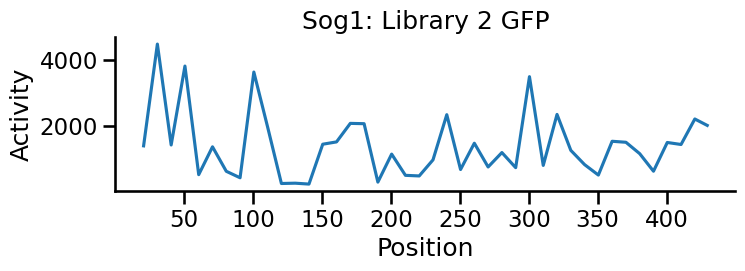

In [20]:
plt.figure(figsize = (8, 2))
sns.set_context('talk')
sns.lineplot(data = wt_tile_activity2, x= "mid", y = "Activity_S3_1")
plt.xlabel("Position")
#plt.ylim(0,  8000)
plt.ylabel("Activity")
plt.title("Sog1: Library 2 GFP")
sns.despine()